In [1]:
from util import *
from glob import glob

In [2]:
df = load_AOIs()
df

,Taranaki,AOI,SSP 4.5 (p50),SSP 4.5 (p83),SSP 8.5 (p50),SSP 8.5 (p83),Rate SSP 4.5 (p50),Rate SSP 4.5 (p83),Rate SSP 8.5 (p50),Rate SSP 8.5 (p83),match,match_score
7,NORTH,TongaporutuRiver,0.57,0.78,0.84,1.10,0.0057,0.0078,0.0084,0.0110,TongapurutuRiverCliffs,93.750000
11,SOUTH,HangatahuaRiver_South,0.57,0.78,0.84,1.10,0.0057,0.0078,0.0084,0.0110,HangatahuRiver_South,97.435897
21,SOUTH,Rahotu,0.58,0.78,0.84,1.10,0.0058,0.0078,0.0084,0.0110,Rahotu,100.000000
20,SOUTH,Pihama,0.57,0.78,0.84,1.10,0.0057,0.0078,0.0084,0.0110,Pihama,100.000000
19,SOUTH,OpunakeBeach,0.57,0.78,0.84,1.10,0.0057,0.0078,0.0084,0.0110,OpunakeBeachCliffs,100.000000
18,SOUTH,OhaweBeach,0.57,0.78,0.83,1.10,0.0057,0.0078,0.0083,0.0110,OhaweBeach,100.000000
17,SOUTH,Oeo,0.57,0.78,0.84,1.10,0.0057,0.0078,0.0084,0.0110,Oeo,100.000000
16,SOUTH,Manutahi,0.57,0.78,0.83,1.10,0.0057,0.0078,0.0083,0.0110,Manutahi,100.000000
15,SOUTH,ManaBay,0.57,0.78,0.83,1.10,0.0057,0.0078,0.0083,0.0110,ManaBayCliffs,100.000000
14,SOUTH,KaupokonuiBeach,0.57,0.78,0.84,1.10,0.0057,0.0078,0.0084,0.0110,KaupokonuiBeach,100.000000


In [3]:
all_results = []
for site in tqdm(df.match):
  gdf = gpd.read_file(f"Shapefiles/{site}_intersects.shp")
  gdf.crs = 2193
  gdf = enrich_df(gdf)
  transect_metadata = get_transect_metadata(f"Shapefiles/{site}_TransectLines.shp")
  if site == "ManaBayCliffs":
    print("Flipping")
    for k, v in transect_metadata.items():
      transect_metadata[k]["Azimuth"] = v["Azimuth"] + 180
  linear_models = fit(gdf, transect_metadata)
  linear_models.loc[linear_models.slope > 0, "slope"] = pd.NA
  rolled_slopes = linear_models.groupby("group").slope.rolling(10, min_periods=1).mean().dropna().reset_index(level=0)
  linear_models.slope = rolled_slopes.slope
  linear_models.dropna(inplace=True)
  linear_models.index = linear_models.TransectID
  # Find the closest data point to 2000
  gdf["years_since_2000"] = (gdf.Year - 2000).abs()
  closest_to_2000 = gdf.loc[gdf.groupby("TransectID").years_since_2000.idxmin()]
  closest_to_2000.set_index("TransectID", inplace=True)
  # Predict to the closest year to 2000
  linear_models["FUTURE_YEAR"] = closest_to_2000.Year
  results = predict(gdf, linear_models, transect_metadata)
  results.index = results.TransectID.astype(int)
  results["True"] = closest_to_2000.geometry
  all_results.append(results)

  0%|          | 0/24 [00:00<?, ?it/s]

Flipping


/home/nyou045/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/nyou045/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/nyou045/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/nyou045/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/nyou045/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with les

In [4]:
all_results = pd.concat(all_results)
all_results

,TransectID,BaselineID,group,Year,ocean_point,linear_model_point,linear_model_distance,sqrt_model_point,sqrt_model_distance,BH_model_point,BH_model_distance,Sunamura_model_point,Sunamura_model_distance,True
TransectID,,,,,,,,,,,,,,
2,2.0,1,0.0,2011,POINT (1734901.294958501 5698259.049972313),POINT (1735114.055735204 5697806.2951233275),0.254037,POINT (1735116.482537082 5697801.130889888),5.960058,POINT (1735120.7613459069 5697792.025586394),16.020612,POINT (1735116.1250134942 5697801.891699942),5.119430,POINT (1735113.825 5697806.787)
3,3.0,1,0.0,2011,POINT (1734897.1336462596 5698251.896706724),POINT (1735121.2748274847 5697811.234611702),-5.609111,POINT (1735126.9420696187 5697800.092800197),6.891193,POINT (1735128.422893738 5697797.181496459),10.157464,POINT (1735123.4785610542 5697806.902066266),-0.748309,POINT (1735123.435 5697806.987)
4,4.0,1,0.0,2011,POINT (1734900.895041738 5698249.22434408),POINT (1735132.9042014643 5697808.620776326),-2.044426,POINT (1735139.1077513464 5697796.839749171),11.270102,POINT (1735140.2502180436 5697794.670115423),13.722150,POINT (1735135.1687063214 5697804.3203042215),2.815826,POINT (1735133.042 5697808.360)
5,5.0,1,0.0,2011,POINT (1734907.5357417199 5698248.764666272),POINT (1735143.546654849 5697809.159026729),-1.046826,POINT (1735149.7475224163 5697797.608983061),12.062493,POINT (1735151.0044365593 5697795.267792401),14.719749,POINT (1735145.845678354 5697804.876751453),3.813564,POINT (1735142.651 5697810.828)
6,6.0,1,0.0,2011,POINT (1734912.0278775676 5698248.993504751),POINT (1735152.9020968357 5697812.110104955),-1.113746,POINT (1735159.1144658017 5697800.8424778795),11.752992,POINT (1735160.514576642 5697798.30303972),14.652829,POINT (1735155.2488885478 5697807.853633071),3.746808,POINT (1735151.779 5697814.147)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,935.0,1,54.0,2017,POINT (1737816.576170825 5589951.845946035),POINT (1737753.1579577175 5590450.353831901),2.525603,POINT (1737750.2278716404 5590473.386190338),25.743591,POINT (1737751.000086336 5590467.316086871),19.624565,POINT (1737752.4935145443 5590455.576781986),7.790648,POINT (1737753.678 5590446.268)
937,937.0,1,54.0,2017,POINT (1737912.846216573 5589977.436519714),POINT (1737757.9367203978 5590458.192832504),5.097599,POINT (1737751.2382318573 5590478.981362139),26.938677,POINT (1737752.6926020337 5590474.467774136),22.196561,POINT (1737756.321686947 5590463.205033473),10.363574,POINT (1737760.122 5590451.411)
938,938.0,1,54.0,2017,POINT (1737913.1251714577 5589978.289947391),POINT (1737765.2494015049 5590466.53784703),10.150228,POINT (1737759.3248150887 5590486.099313218),30.589202,POINT (1737760.2929748714 5590482.902697704),27.249190,POINT (1737763.7226939425 5590471.578644187),15.417150,POINT (1737768.552 5590455.633)


In [5]:
for model in SUPPORTED_MODELS:
  all_results[f"{model}_model_error"] = gpd.GeoSeries(all_results[f"{model}_model_point"], crs=2193).distance(all_results["True"])

In [6]:
all_results[["linear_model_error", "sqrt_model_error", "BH_model_error", "Sunamura_model_error"]].describe()

,linear_model_error,sqrt_model_error,BH_model_error,Sunamura_model_error
count,16090.000000,16090.000000,16090.000000,16090.000000
mean,5.225654,20.095744,17.066711,7.585884
std,6.289969,22.389261,7.619461,6.520794
min,0.000181,0.008917,0.003291,0.000478
25%,1.323460,5.130125,13.267959,3.701996
50%,3.245376,12.046586,16.816602,6.081661
75%,6.892127,26.288259,20.188231,9.556913
max,114.836160,241.480949,130.602736,119.619823


<AxesSubplot: >

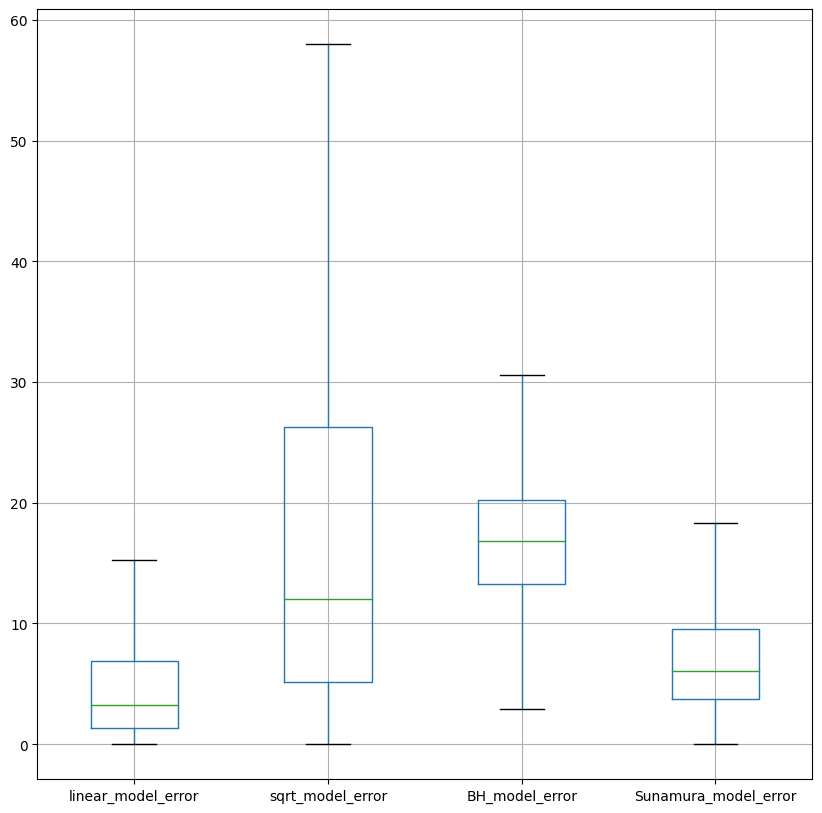

In [7]:
all_results[["linear_model_error", "sqrt_model_error", "BH_model_error", "Sunamura_model_error"]].boxplot(figsize=(10,10), showfliers=False)